# RED WINE QUALITY PREDICTION

# Importing Libraries

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Importing all required libraries

# Importing dataset

In [2]:
#Import the dataset

data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Importing the dataset and analyze all the columns

# Datatypes of all columns

In [3]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

We have integer datatype in quality which is target variable and rest are float which are independent variable. 

# Checking for null values

In [4]:
#check for is there any values present in the dataset 

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see no null values present in the dataset. There are no missing values in whole dataset, so we can proceed safely.

# Shape of data

In [5]:
data.shape

(1599, 12)

There are 1599 rows and 12 columns in dataset

# Detailed Description

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see detailed description of all rows and columns like count, mean value, standard deviation, minimum and maximum values, 25th, 50th(median) and 75th percentile values.

# EDA (EXPLORATORY DATA ANALYSIS)

# Visualization (Uni Variate Analysis)

<b>Uni variate analysis works with only one variable, hence it is called as uni variate.<b>

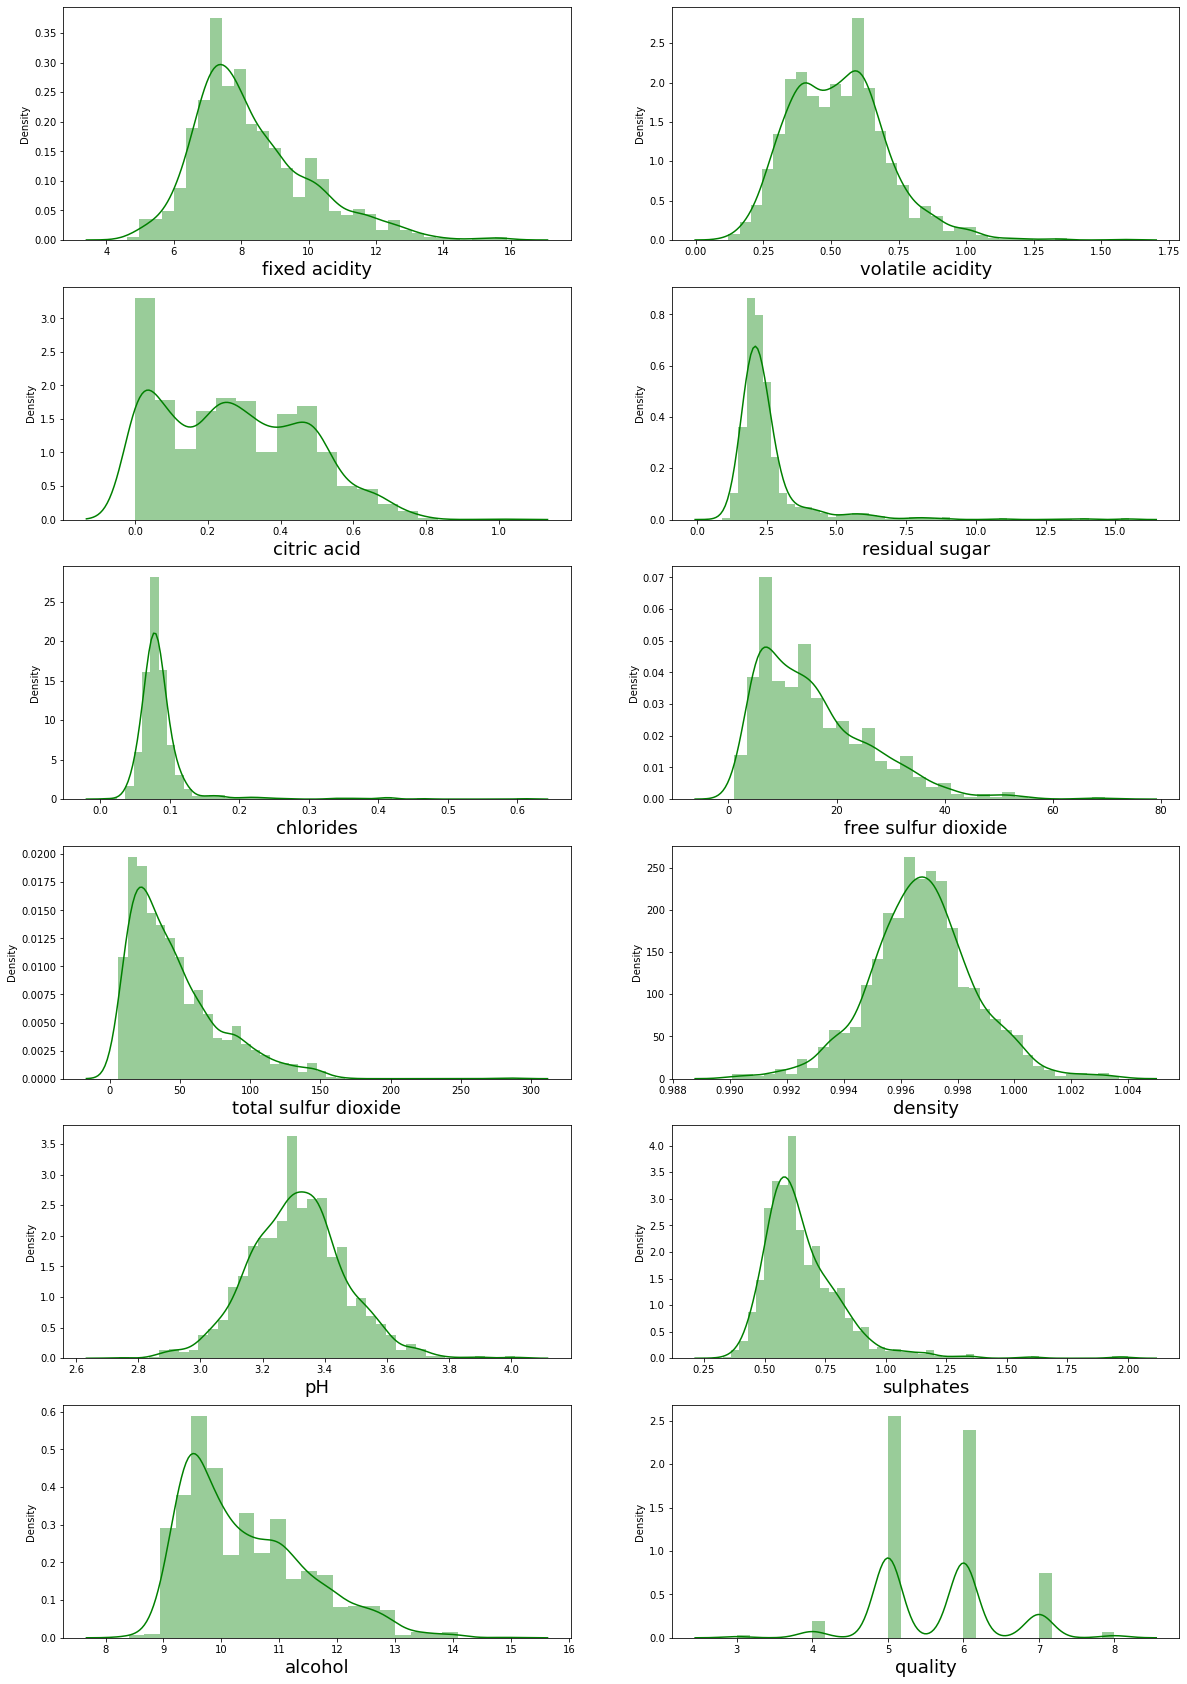

In [7]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15:  #as we can see there are 12 columns in the data 
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(data[column], color = 'g')
        plt.xlabel(column, fontsize=18)
        
    plotnumber += 1
plt.show()

As shown in distplot almost every input variable is having skewness. Data columns are not normally distributed. So, we need to remove skewness from all the input variable.

# Analysis through boxplot

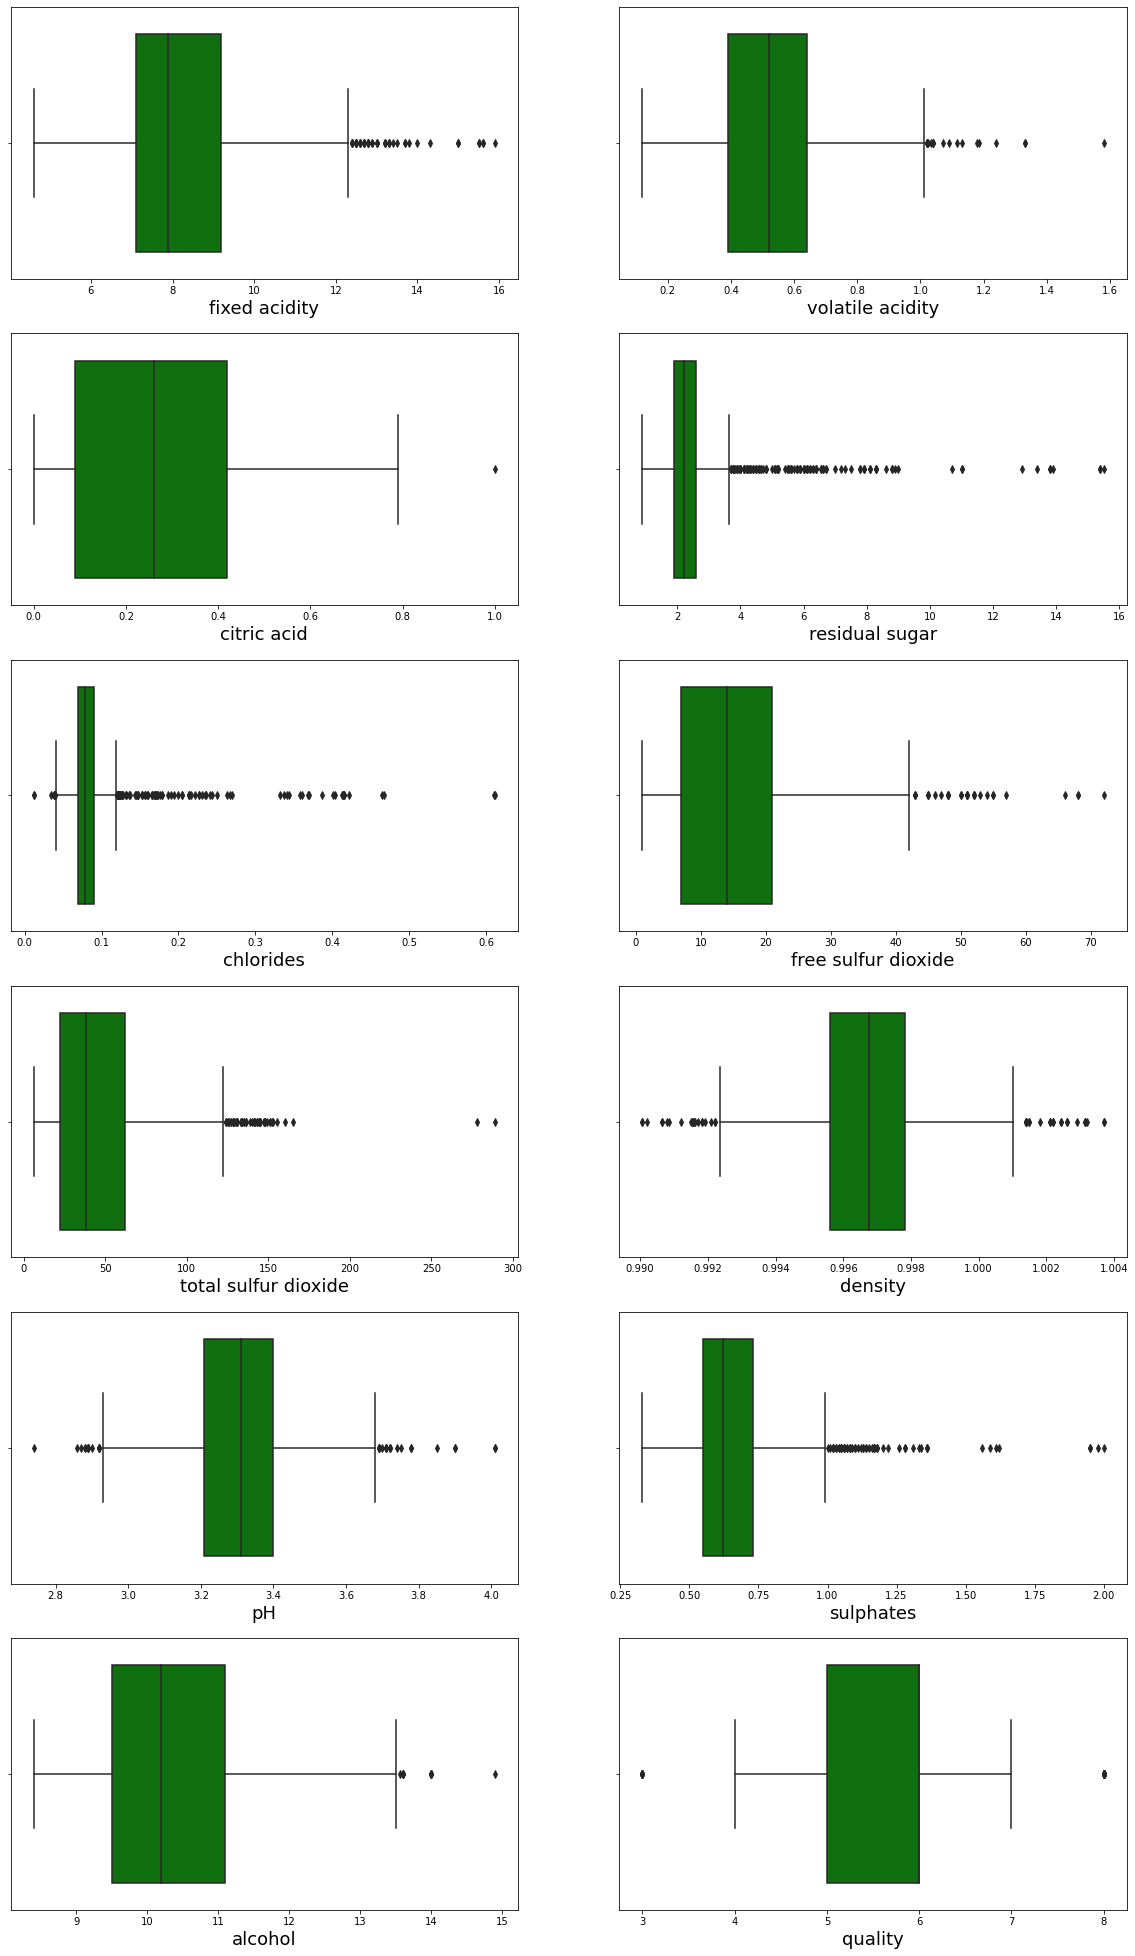

In [8]:
#Relationship Visualizing

plt.figure(figsize = (20,35), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15:  #as we can see there are 12 columns in the data 
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column], color = 'g')
        plt.xlabel(column, fontsize=18)
        
    plotnumber += 1
plt.show()

As shown in boxplot almost every input variable is having outliers. So, we need to remove outliers from all the input variable.

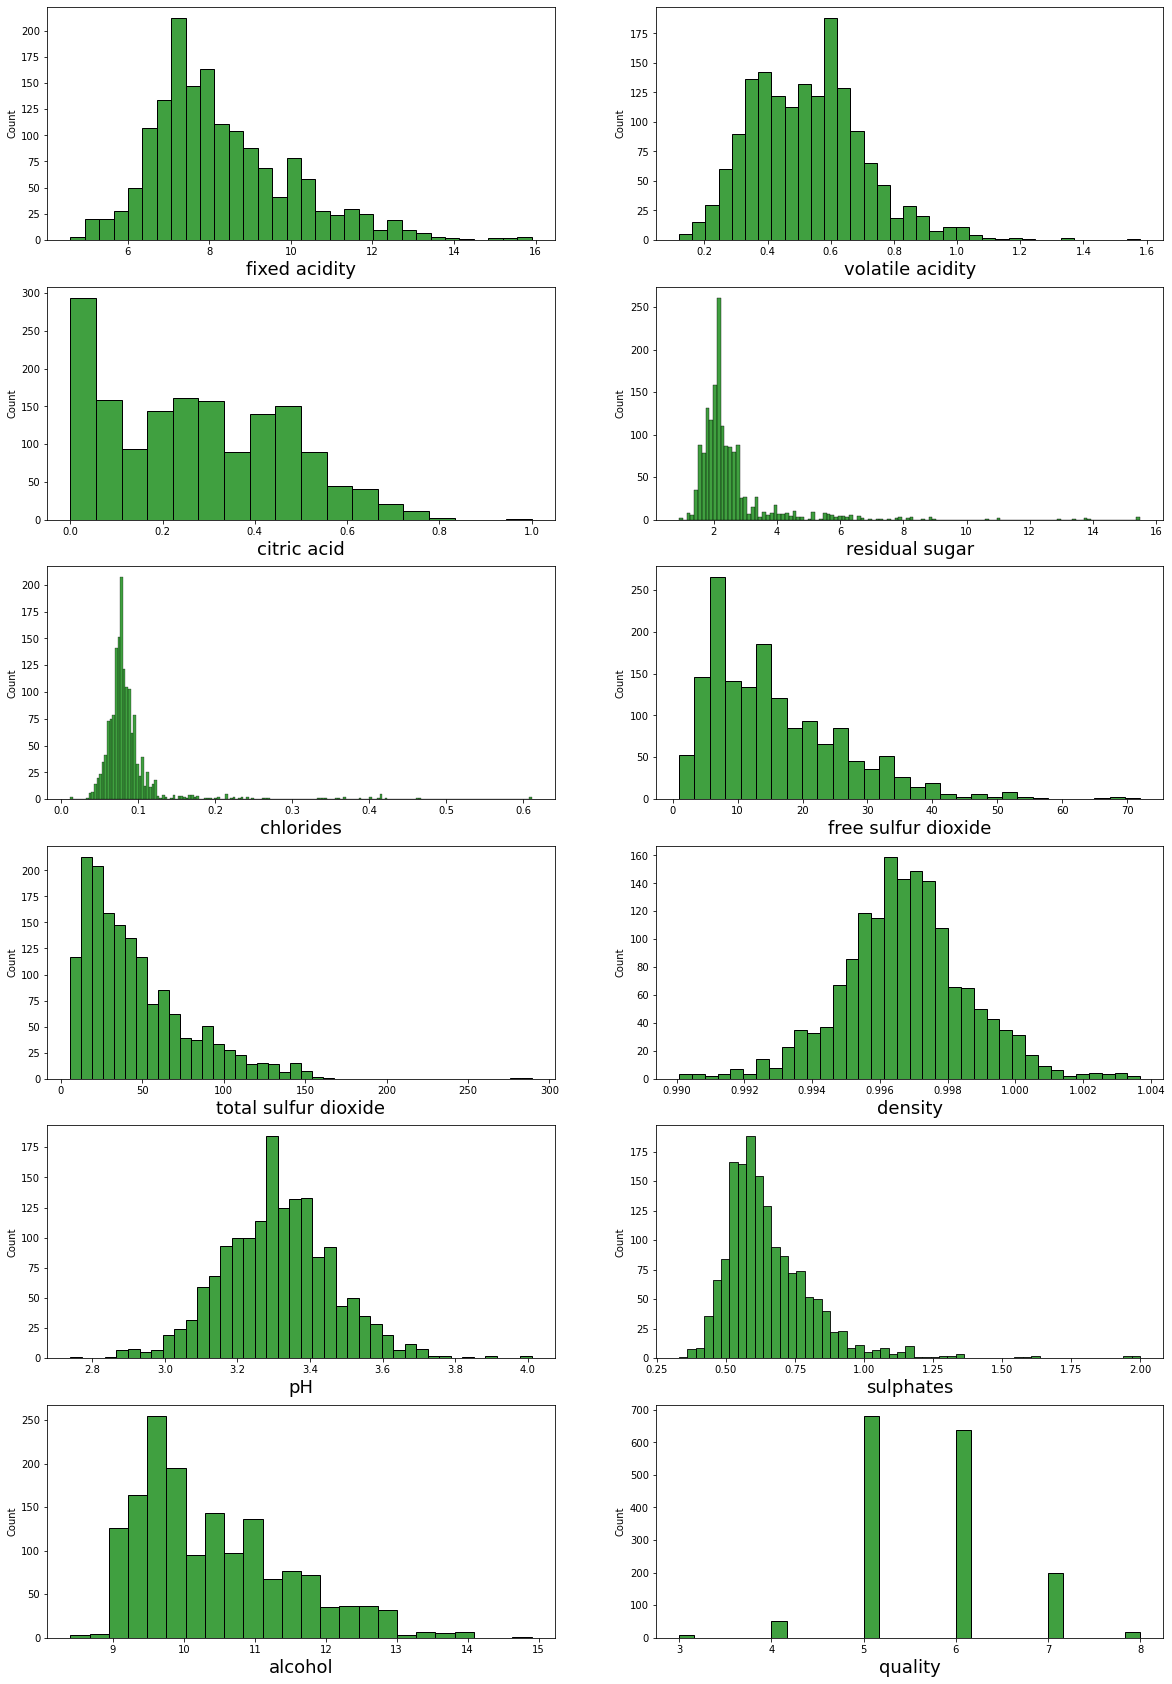

In [9]:
#Relationship Visualizing

plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15:  #as we can see there are 12 columns in the data 
        ax = plt.subplot(6,2,plotnumber)
        sns.histplot(data[column], color = 'g')
        plt.xlabel(column, fontsize=18)
        
    plotnumber += 1
plt.show()

As shown in histplot almost every input variable is having skewness. Data columns are not normally distributed. So, we need to remove skewness from all the input variable.

# Bi variate analysis

<b>Bi variate analysis works with two variables.<b>

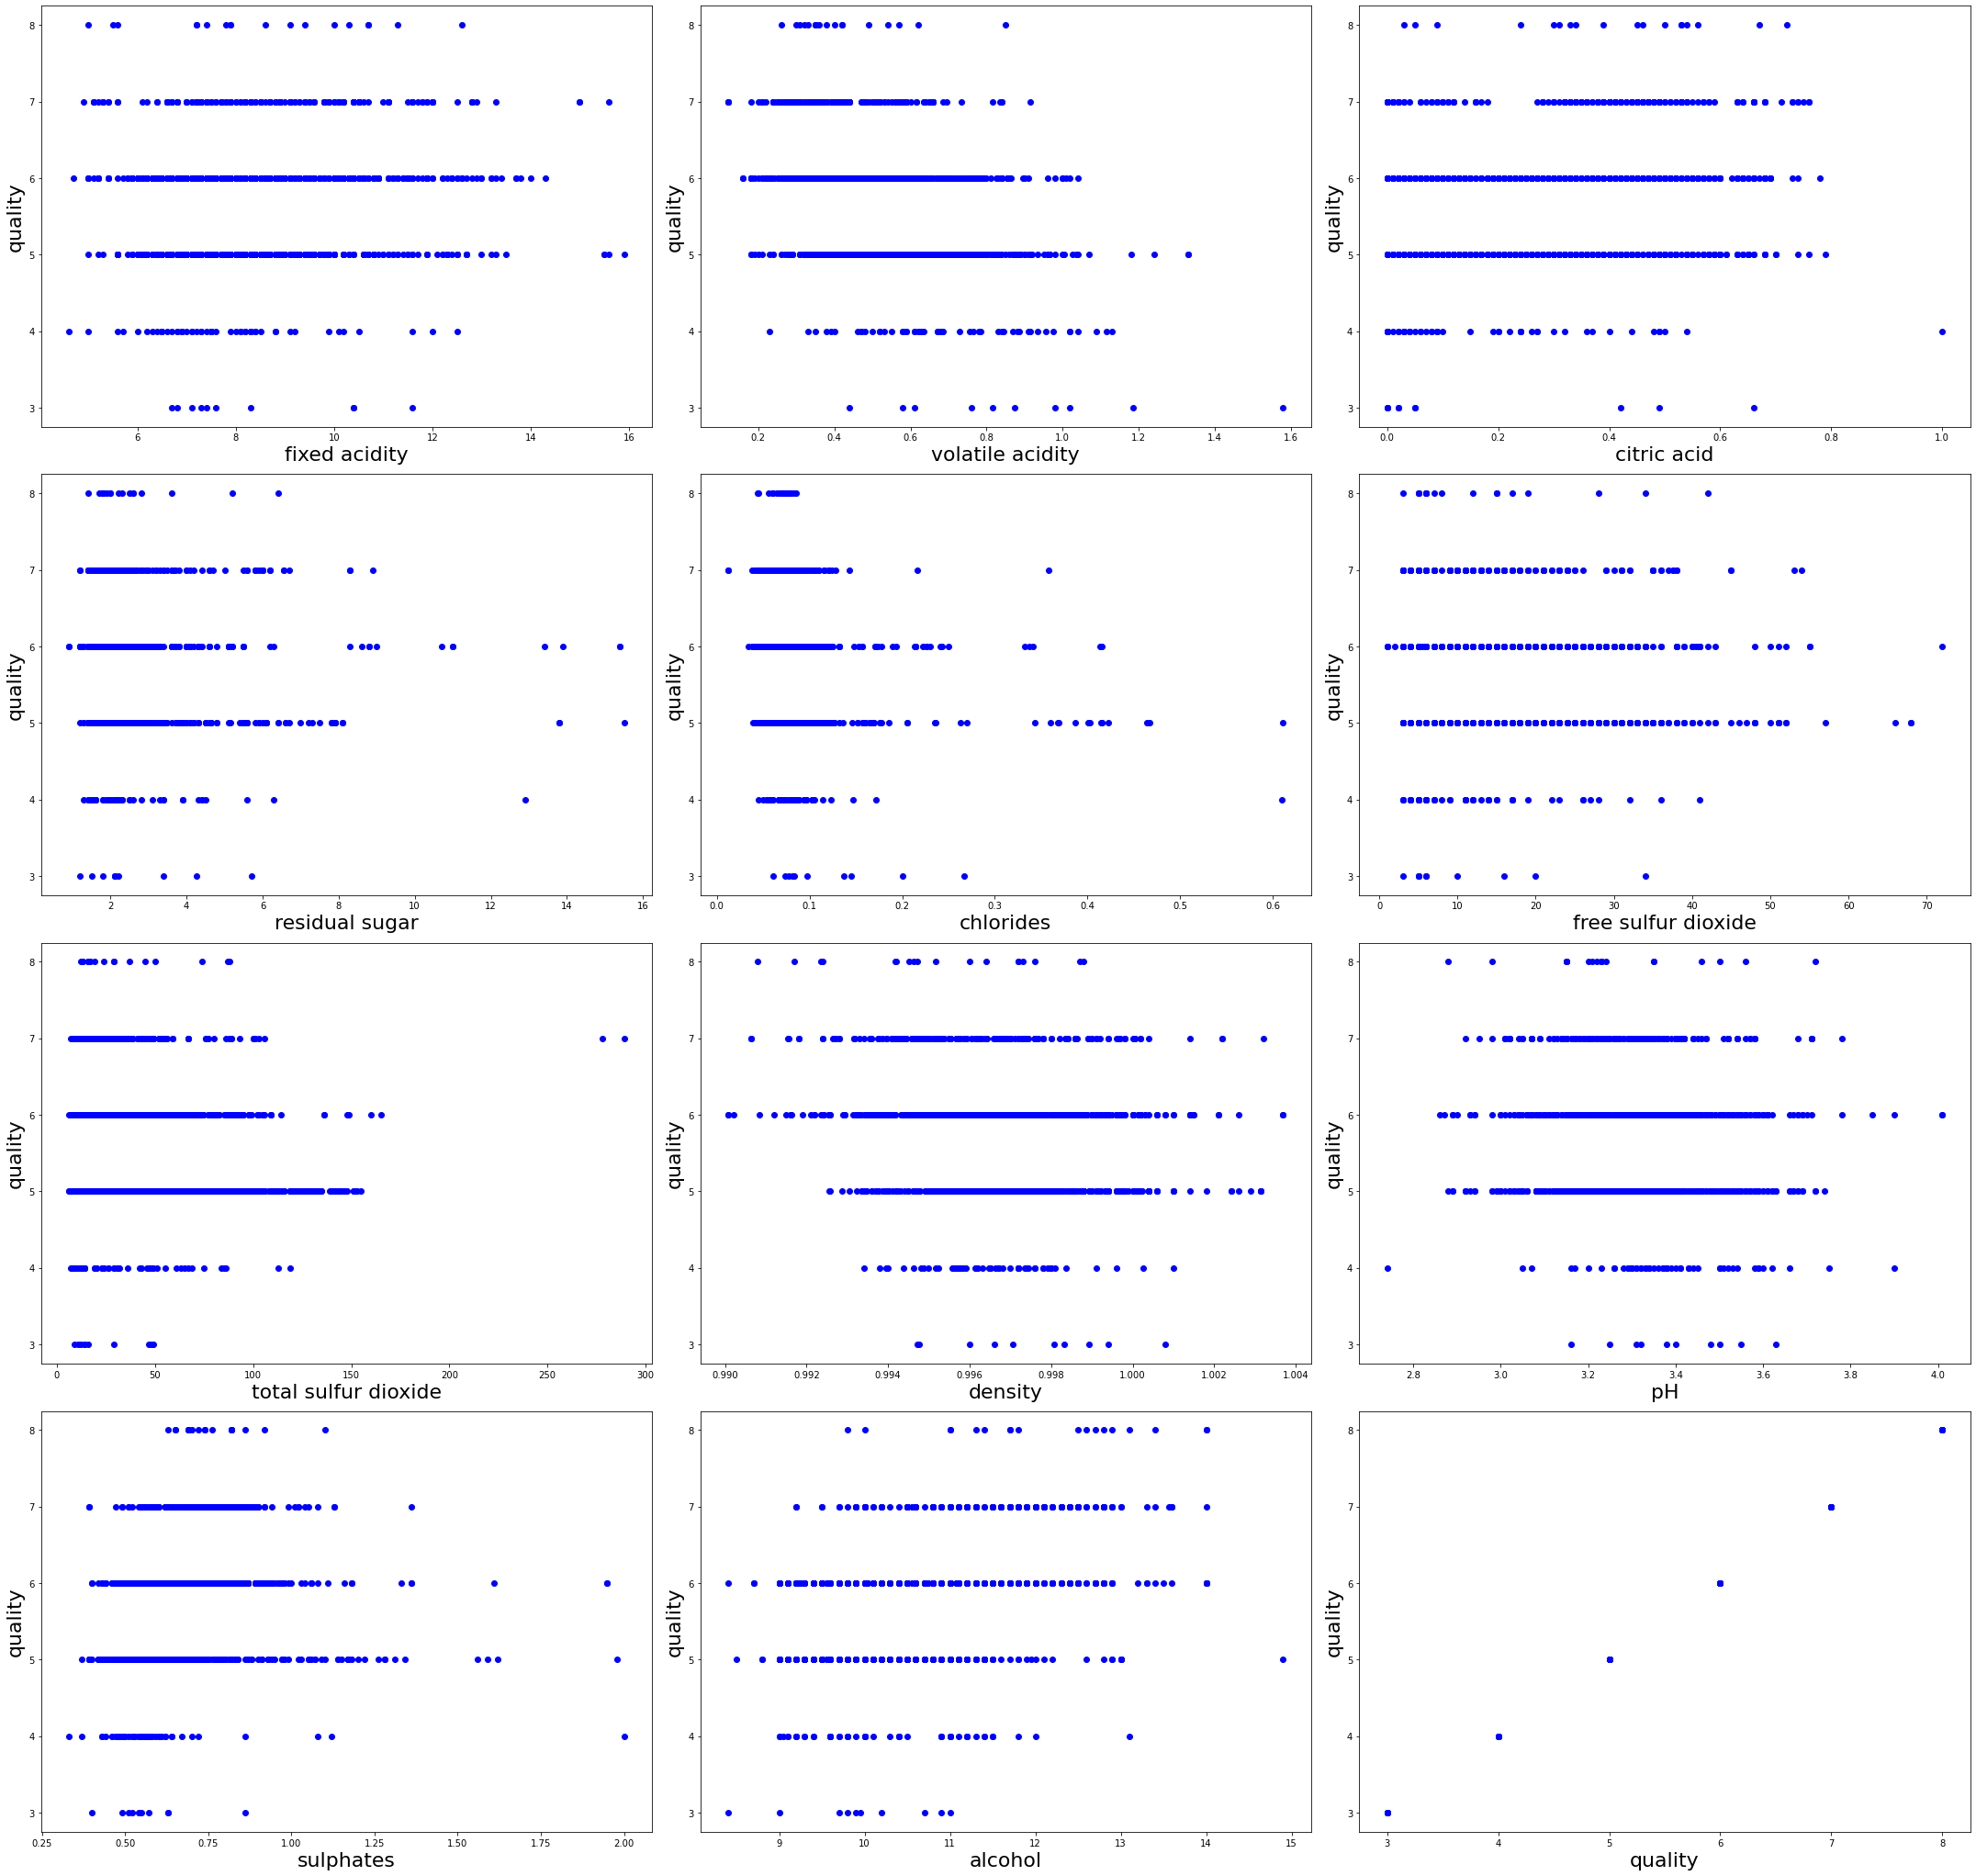

In [10]:
#Relationship Visualizing

plt.figure(figsize = (30,35), facecolor = 'white')
plotnumber = 1

for column in data:
    if plotnumber <= 15:  #as we can see there are 12 columns in the data 
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(data[column], data['quality'], color='b')
        plt.xlabel(column, fontsize=22)
        plt.ylabel('quality',fontsize=22)
        
    plotnumber += 1
plt.tight_layout()

As we have seen in the plot some outliers are present in it.

# Multi Variate Analysis

Multi variate analysis fid the relationship with all variables. Now we will visualize the data and check the coefficient of multicollinearity

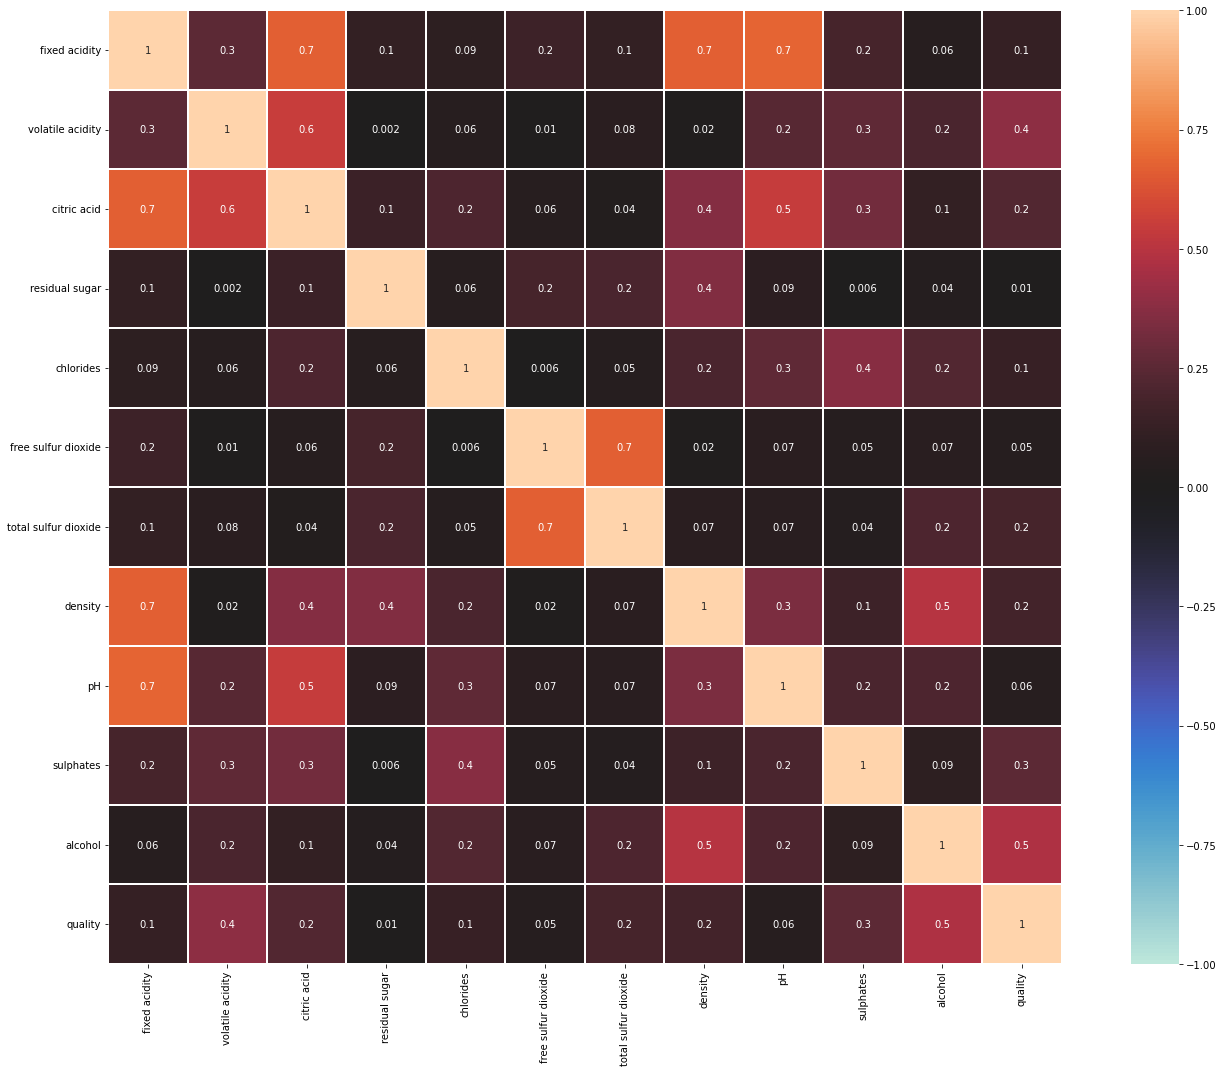

In [11]:
data_cor = data.corr().abs()

plt.figure(figsize=(20,15))
sns.heatmap(data_cor, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.1g', linewidth=.1)
plt.tight_layout()

As shown in the plot 'volatile acidity' and 'residual sugar' correlation value is less 0.002

<b>Find out which columns are positively and negatively correlated with each other<b>

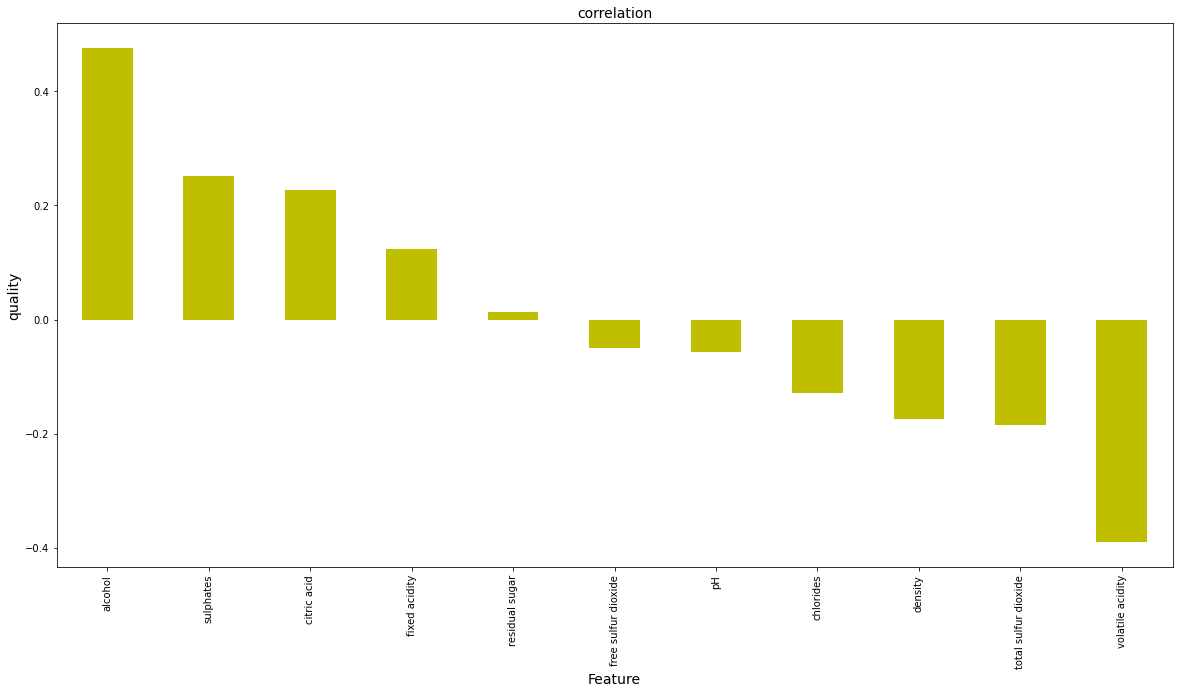

In [12]:
plt.figure(figsize=(20,10))
data.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind = 'bar', color='y')
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('quality', fontsize = 14)
plt.title('correlation', fontsize = 14)
plt.show()

As we have seen in the plot 'residual sugar' and target variable is having very less correlation with each other.

<b>After visualization conclude that all the variables are having some good amount relationship with target variable. Now proceed further for next steps:<b>

# Remove outliers

Now we have found the outliers and skewness in some variables. So first removing outliers.

# 1. Outliers removal using Zscore

In [13]:
# In Zscore technique taking standard deviation 3
# for Zscore outlier removal technique import library from scipy

from scipy.stats import zscore

zs = zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_zscore = np.abs(zs)

new_values = (abs_zscore < 3).all(axis = 1)
new_data = data[new_values]

print("Shape before :", data.shape)
print("Shape after :", new_data.shape)
print("Percentage loss :", (data.shape[0]-new_data.shape[0])/data.shape[0])


Shape before : (1599, 12)
Shape after : (1458, 12)
Percentage loss : 0.08818011257035648


8.818% data loss after using Zscore technique. 
91.182% data remains same.

In [14]:
new_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,5.646776
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.801119
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


# 2. Outlier Removing using IQR

<b>from boxplot in EDA, we came to know that outliers present in following columns.<b>

In [15]:
data2 = data

In [16]:
#features in which outliers are detected
features = data2[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]


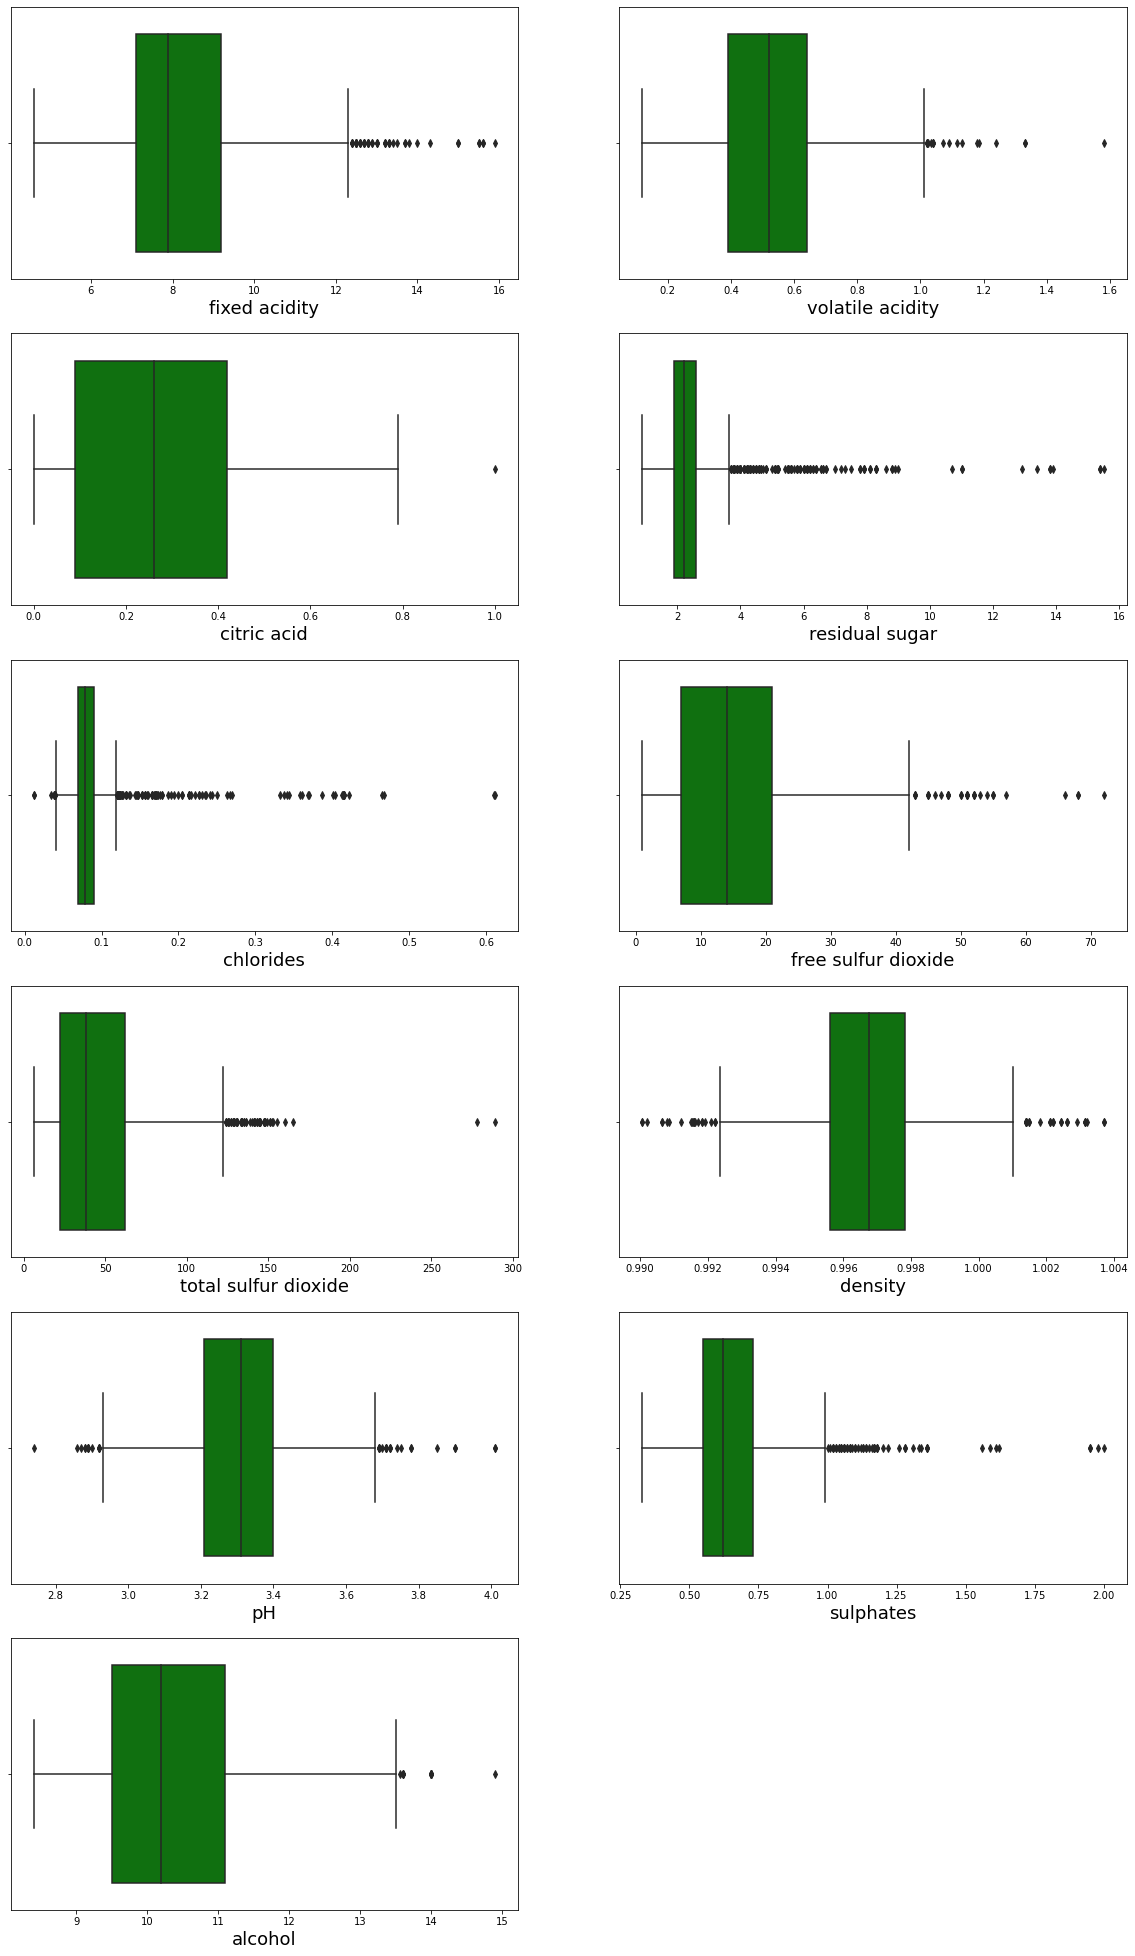

In [17]:
plt.figure(figsize = (20,35))
plotnumber = 1

for column in features:
    if plotnumber <= 30:  
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(features[column], color = 'g')
        plt.xlabel(column, fontsize=18)
        
    plotnumber += 1
plt.show()

In [18]:
#find the IQR (Inter Quantile Range) to identify outliers
#formula for finding IQR

#1st quantile 25%
q1 = data2.quantile(0.25)

#3rd quantile 75%
q3 = data2.quantile(0.75)

#IQR = Inter Quantile Range
iqr = q3 - q1

In [19]:
data2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Outlier detection formula

<b>Higher side -> Q3 + (1.5*IQR)
    
<b>Lower side -> Q1 - (1.5*IQR)

Outliers removal from higher side

In [20]:
#as shown in boxplot we have outlier in higher side of fixed acidity 
#Remove outliers from higher side so, use higher side formula

fixed_acidity_ = q3 + (1.5*(q3-q1))
fixed_acidity_ = (9.200000 + (1.5*(9.200000 - 7.100000)))
fixed_acidity_

12.349999999999998

In [21]:
index_out = np.where(data2['fixed acidity'] > fixed_acidity_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1546,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1547,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1548,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from fixed acidity 1550 rows will remains in dataframe.

In [22]:
#as shown in boxplot we have outlier in higher side of volatile acidity
#Remove outliers from higher side so, use higher side formula

volatile_acidity_ = q3 + (1.5*(q3-q1))
volatile_acidity_ = (0.640000 + (1.5*(0.640000 - 0.390000)))
volatile_acidity_

1.0150000000000001

In [23]:
index_out = np.where(data2['volatile acidity'] > volatile_acidity_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1527,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1528,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1529,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from volatile acidity 1531 rows will remains in dataframe.

In [24]:
#as shown in boxplot we have outlier in higher side of citric acidity 
#Remove outliers from higher side so, use higher side formula

citric_acidity_ = q3 + (1.5*(q3-q1))
citric_acidity_ = (0.420000 + (1.5*(0.420000 - 0.090000)))
citric_acidity_

0.9149999999999999

In [25]:
index_out = np.where(data2['citric acid'] > citric_acidity_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1526,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1527,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1528,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from citric acid 1530 rows will remains in dataframe.

In [26]:
#as shown in boxplot we have outlier in higher side of residual sugar 
#Remove outliers from higher side so, use higher side formula

residual_sugar_ = q3 + (1.5*(q3-q1))
residual_sugar_ = (2.600000 + (1.5*(2.600000 - 1.900000)))
residual_sugar_

3.6500000000000004

In [27]:
index_out = np.where(data2['residual sugar'] > residual_sugar_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1388,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1389,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1390,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from residual suger 1392 rows will remains in dataframe.

In [28]:
#as shown in boxplot we have outlier in higher side of chlorides 
#Remove outliers from higher side so, use higher side formula

chlorides_ = (q3.chlorides + (1.5*(iqr.chlorides)))
chlorides_

0.11999999999999998

In [29]:
index_out = np.where(data2['chlorides'] > chlorides_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1307,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1308,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1309,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from cloride 1311 rows will remains in dataframe.

In [30]:
#Check the Outliers for chlorides
#Remove outliers from lower side so, use lower side formula

chlorides_lowerside = (q1.chlorides - (1.5*(iqr.chlorides)))
chlorides_lowerside

0.04000000000000002

In [31]:
index_out = np.where(data2['chlorides'] < chlorides_lowerside)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1298,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1299,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1300,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from cloride 1302 rows will remains in dataframe.

In [32]:
#as shown in boxplot we have outlier in higher side of free sulfur dioxide also
#Remove outliers from higher side so, use higher side formula

sulfur_dioxid_ = (21.000000 + (1.5*(21.000000 - 7.000000)))
sulfur_dioxid_

42.0

In [33]:
index_out = np.where(data2['free sulfur dioxide'] > sulfur_dioxid_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1282,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1283,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1284,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from free sulfur dioxide 1286 rows will remains in dataframe.

In [34]:
#as shown in boxplot we have outlier in higher side of total sulfur dioxide also
#Remove outliers from higher side so, use higher side formula

total_sulfer_dioxide = (62.000000 + (1.5*(62.000000 - 22.000000)))
total_sulfer_dioxide

122.0

In [35]:
index_out = np.where(data2['total sulfur dioxide'] > total_sulfer_dioxide)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1246,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1247,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1248,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from total sulfur dioxide 1250 rows will remains in dataframe.

In [36]:
#as shown in boxplot we have outlier in higher side of density also
#Remove outliers from higher side so, use higher side formula

density_ = (q3.density + (1.5*(iqr.density)))
density_

1.0011875

In [37]:
index_out = np.where(data2['density'] > density_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1246,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1247,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1248,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from density 1250 rows will remains in dataframe.

In [38]:
#as shown in boxplot we have outlier in lower side of pH 
#Remove outliers from lower side so, use lower side formula

pH_ = (q1.pH - (1.5*(iqr.pH)))
pH_

2.925

In [39]:
index_out = np.where(data2['pH'] < pH_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1240,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1241,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1242,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from pH 1244 rows will remains in dataframe.

In [40]:
#as shown in boxplot we have outlier in higher side of pH 
#Remove outliers from lower side so, use higher side formula

pH_high = (q3.pH + (1.5*(iqr.pH)))
pH_high

3.6849999999999996

In [41]:
index_out = np.where(data2['pH'] > pH_high)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1222,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1223,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1224,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from pH 1226 rows will remains in dataframe.

In [42]:
#as shown in boxplot we have outlier in higher side of sulphates 
#Remove outliers from lower side so, use higher side formula

sulphates_ = (q3.sulphates + (1.5*(iqr.sulphates)))
sulphates_

0.9999999999999999

In [43]:
index_out = np.where(data2['sulphates'] > sulphates_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1202,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1203,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1204,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from sulphates 1206 rows will remains in dataframe.

In [44]:
#as shown in boxplot we have outlier in higher side of alcohol 
#Remove outliers from lower side so, use higher side formula

alcohol_ = (q3.alcohol + (1.5*(iqr.alcohol)))
alcohol_

13.5

In [45]:
index_out = np.where(data2['alcohol'] > alcohol_)
data2 = data2.drop(data2.index[index_out])
data2.shape
data2.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1194,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1195,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1196,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


after removing outliers from alcohol 1198 rows will remains in dataframe.

<b>After removing outliers using IQR technique there are 1198 rows will remains in dataset.


Now, find how much data loss in IQR method

74.68% data remains after removing outliers using IQR technique

25.32% data loss in IQR method


<b>After applying Zscore and IQR technique to remove outliers. We conclude that less amount data will loss in Zscore technique so we will go with Zscore technique

# Check the skewness and remove it


In [46]:
new_data.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 0.248823
dtype: float64

As we see there are some variables are skewed, whose value is not lying between -0.5 to +0.5 and that are fixed acidity, residual suger, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol

<b>Check datatype of outliers

 If data types of skewed column is integer (catogorical) than no need to remove skewness from that variable.

In [47]:
new_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Apply Log transformation to remove skewness


In log transformation, we will take the log of Continues skewed data and convert that into normal data(distribution)/less skewed data and in power transformation we will take the mean value in place of 0th value.

In [48]:
#applying log transformation on skewed columns

new_data['fixed acidity'] = np.log(new_data['fixed acidity'])
new_data['residual sugar'] = np.log(new_data['residual sugar'])
new_data['chlorides'] = np.log(new_data['chlorides'])
new_data['free sulfur dioxide'] = np.log(new_data['free sulfur dioxide'])
new_data['total sulfur dioxide'] = np.log(new_data['total sulfur dioxide'])
new_data['sulphates'] = np.log(new_data['sulphates'])
new_data['alcohol'] = np.log(new_data['alcohol'])

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

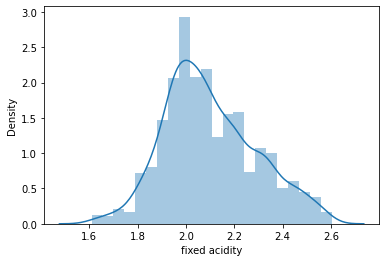

In [49]:
sns.distplot(new_data['fixed acidity'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

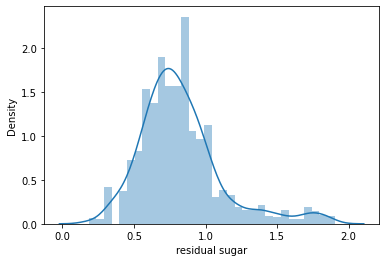

In [50]:
sns.distplot(new_data['residual sugar'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

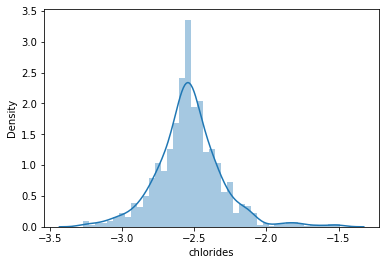

In [51]:
sns.distplot(new_data['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

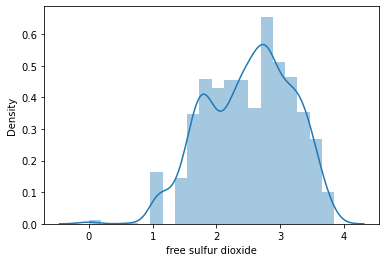

In [52]:
sns.distplot(new_data['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

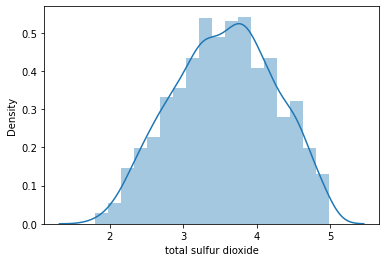

In [53]:
sns.distplot(new_data['total sulfur dioxide'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

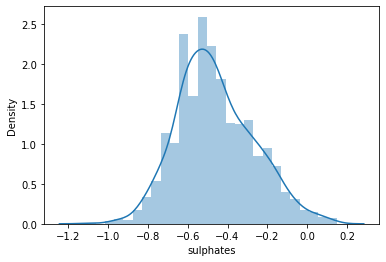

In [54]:
sns.distplot(new_data['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

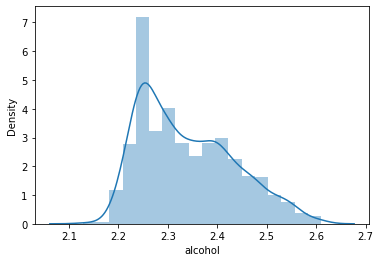

In [55]:
sns.distplot(new_data['alcohol'])

As shown in distplot skewness removes after using log transformation skewness removal technique.

# Seperating the columns into featuers and target:


<b>X= features, y=Target

In [56]:
x = new_data.drop(columns = 'quality', axis=1)
y = new_data['quality']

# <b> Scalling technique

In [57]:
#importing Libraries
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_scaled = sc.fit_transform(x)


variables are scaled now using standard scaler technique.

# Variance inflation factor


In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,7.970581,fixed acidity
1,1.842977,volatile acidity
2,3.069527,citric acid
3,1.773929,residual sugar
4,1.233243,chlorides
5,2.863860,free sulfur dioxide
6,3.161391,total sulfur dioxide
7,6.714040,density
8,3.365932,pH
9,1.354603,sulphates


as we have seen in the table vif value is greater than 5 for two columns, so drop maximum value columns to avoid multicollinearity issue.

In [59]:
new_data=new_data.drop(['fixed acidity'], axis=1)

In [60]:
x = new_data.drop(columns = 'quality', axis=1)
y = new_data['quality']

In [61]:
ss = StandardScaler()
x_scalar = ss.fit_transform(x)

In [62]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scalar, i) for i in range(x_scalar.shape[1])]
vif["Features"] = x.columns

#lets check the values
vif

,vif,Features
0,1.842651,volatile acidity
1,2.800593,citric acid
2,1.543204,residual sugar
3,1.224869,chlorides
4,2.824036,free sulfur dioxide
5,3.040549,total sulfur dioxide
6,2.770078,density
7,1.532585,pH
8,1.339466,sulphates
9,2.413445,alcohol


after dropping column we can seen the value of vif is decreases, so multicolinearity issue will not occurs.



# Finding best random state


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.tree import DecisionTreeClassifier
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.30, random_state=i)
    mod= DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.6506849315068494 on Random_state  106


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar, y, test_size=0.2, random_state = 106)


# 1.Logistic Regression Model


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Log_reg =LogisticRegression()
Log_reg.fit(x_train, y_train)

LogisticRegression()

In [67]:
pred_test=Log_reg.predict(x_test)

In [68]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.6164383561643836
[[ 0 10  4  0  0]
 [ 0 94 33  0  0]
 [ 0 39 71  8  0]
 [ 0  0 16 15  0]
 [ 0  0  1  1  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.66      0.74      0.70       127
           6       0.57      0.60      0.58       118
           7       0.62      0.48      0.55        31
           8       0.00      0.00      0.00         2

    accuracy                           0.62       292
   macro avg       0.37      0.37      0.37       292
weighted avg       0.58      0.62      0.60       292



In [69]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Log_reg, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5754460292802334

The Accuracy score for logistic regression model is : 61.643
    
Cross validation score for logistic regression is : 57.544

# 2.Random forest Classifier


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters ={'criterion':['gini', 'entropy'], 'max_features':["auto","sqrt","log2"]}
Rfr= RandomForestClassifier()
clf =GridSearchCV(Rfr, parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2'}


In [71]:
Rfr =RandomForestClassifier(criterion = "entropy", max_features="log2")
Rfr.fit(x_train, y_train)
Rfr.score(x_train, y_train)
pred_decision = Rfr.predict(x_test)

Rfrs = accuracy_score(y_test,pred_decision)
print('accuracy score: ',Rfrs*100)

Rfrscore = cross_val_score(Rfr, x, y, cv=3)
Rfrc = Rfrscore.mean()
print('Cross Val Score: ',Rfrc*100)

accuracy score:  70.2054794520548
Cross Val Score:  55.6241426611797


The Accuracy score for Random Forest Classifier model is : 70.20%

Cross validation score for Random Forest Classifier is : 55.62%


# 3.Decision Tree Classifier


In [72]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [73]:
pred_DT = DT.predict(x_test)
print(accuracy_score(y_test,pred_DT))

0.6267123287671232


In [74]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test,pred_DT))

[[ 0  0  0  0  0  0]
 [ 1  1  7  4  1  0]
 [ 0  3 97 26  1  0]
 [ 0  2 39 69  7  1]
 [ 0  0  1 11 16  3]
 [ 0  0  0  2  0  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.17      0.07      0.10        14
           5       0.67      0.76      0.72       127
           6       0.62      0.58      0.60       118
           7       0.64      0.52      0.57        31
           8       0.00      0.00      0.00         2

    accuracy                           0.63       292
   macro avg       0.35      0.32      0.33       292
weighted avg       0.62      0.63      0.62       292



In [75]:
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(DT, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.46296191686673255

The Accuracy score for Decision tree Classifier model is : 62.67%

Cross validation score for Decision tree Classifier is : 46.29%


# 4.Support vector Classifier


In [76]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [77]:
pred_sv = sv.predict(x_test)
print(accuracy_score(y_test,pred_sv))

0.6575342465753424


In [78]:
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

[[  0  12   2   0   0]
 [  0 100  27   0   0]
 [  0  37  76   5   0]
 [  0   1  14  16   0]
 [  0   0   2   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        14
           5       0.67      0.79      0.72       127
           6       0.63      0.64      0.64       118
           7       0.76      0.52      0.62        31
           8       0.00      0.00      0.00         2

    accuracy                           0.66       292
   macro avg       0.41      0.39      0.39       292
weighted avg       0.62      0.66      0.64       292



In [79]:
cv_score= cross_val_score(sv, x, y, cv=5)
cv_mean=cv_score.mean()
cv_mean

0.5397519182789624

The Accuracy score for SVC model is : 65.75%

Cross validation score for SVC is : 53.97%


# Comparison of all model


<b>As shown in above table Logistic degression is having minimum difference, so Logistic Regression is the best model


# Hyper parameter tunning


In [80]:
#Logistic Regression

Parameters = {'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'C' : [1, 10, 0.1]}

In [81]:
GCV=GridSearchCV(LogisticRegression(),Parameters,cv=5)

In [82]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 0.1],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [83]:
GCV.best_params_ # printing the best parameters found by GridSearchCV

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [84]:
mod = LogisticRegression( C=1, penalty='l2', solver='newton-cg')

mod.fit(x_train, y_train)
pred =mod.predict(x_test)
print(accuracy_score(y_test, pred)*100)

61.64383561643836


after hyper parameter tunning accuracy score is: 61.64%

In [85]:
new_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

# ROC AUC curve to choose best model

In [86]:
# plot ROC/AUC for multiple models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [87]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sv = SVC()

In [88]:
#train all classifiers
lr.fit(x_train, y_train)
rf.fit(x_train, y_train)
dt.fit(x_train, y_train)
sv.fit(x_train, y_train)

print("Now all models are trained")

Now all models are trained


In [89]:
#All model score captured

lr.score(x_train, y_train)
rf.score(x_train, y_train)
dt.score(x_train, y_train)
sv.score(x_train, y_train)

print("all model test score captured")

all model test score captured


# Find ROC AUC Score

In [ ]:
#logistic Regression
roc_auc_score(y_test, lr.predict(x_test), multi_class='ovo')

In [ ]:
# Random Forest Classifier
roc_auc_score(y_test, rf.predict(x_test), multi_class='ovo')

In [ ]:
#Decision Tree Classifier
roc_auc_score(y_test, dt.predict(x_test), multi_class='ovo')

In [ ]:
#SVC
roc_auc_score(y_test, sv.predict(x_test), multi_class='ovo')

# Saving the model


In [90]:
import joblib
joblib.dump(mod,"RedWineQuality.pkl")

['RedWineQuality.pkl']

# Loding model


In [91]:
model = joblib.load("RedWineQuality.pkl")

In [92]:
prediction = model.predict(x_test)

In [93]:
prediction=pd.DataFrame(prediction)
#converted into data frame

In [94]:
prediction.to_csv('Results.csv', index = False)
#prediction saving